In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [ ]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-06,256.200012,257.829987,251.940002,253.250000,250.826828,21328200
1,2022-09-07,254.699997,258.829987,253.220001,258.089996,255.620483,24126700
2,2022-09-08,257.510010,260.429993,254.789993,258.519989,256.046387,20319900
3,2022-09-09,260.500000,265.230011,260.290009,264.459991,261.929504,22084700
4,2022-09-12,265.779999,267.450012,265.160004,266.649994,264.098602,18747700
...,...,...,...,...,...,...,...
245,2023-08-28,325.660004,326.149994,321.720001,323.700012,323.700012,14808500
246,2023-08-29,321.880005,328.980011,321.880005,328.410004,328.410004,19284600
247,2023-08-30,328.670013,329.809998,326.450012,328.790009,328.790009,15222100
248,2023-08-31,329.200012,330.910004,326.779999,327.760010,327.760010,26411000


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2022-09-06,253.250000
1,2022-09-07,258.089996
2,2022-09-08,258.519989
3,2022-09-09,264.459991
4,2022-09-12,266.649994
...,...,...
245,2023-08-28,323.700012
246,2023-08-29,328.410004
247,2023-08-30,328.790009
248,2023-08-31,327.760010


In [ ]:
df['Date']

0      2022-09-06
1      2022-09-07
2      2022-09-08
3      2022-09-09
4      2022-09-12
          ...    
245    2023-08-28
246    2023-08-29
247    2023-08-30
248    2023-08-31
249    2023-09-01
Name: Date, Length: 250, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
df

,Date,Close
0,2022-09-06,253.250000
1,2022-09-07,258.089996
2,2022-09-08,258.519989
3,2022-09-09,264.459991
4,2022-09-12,266.649994
...,...,...
245,2023-08-28,323.700012
246,2023-08-29,328.410004
247,2023-08-30,328.790009
248,2023-08-31,327.760010


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-36-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0     2022-09-06
1     2022-09-07
2     2022-09-08
3     2022-09-09
4     2022-09-12
         ...    
245   2023-08-28
246   2023-08-29
247   2023-08-30
248   2023-08-31
249   2023-09-01
Name: Date, Length: 250, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2022-09-06,253.250000
2022-09-07,258.089996
2022-09-08,258.519989
2022-09-09,264.459991
2022-09-12,266.649994
...,...
2023-08-28,323.700012
2023-08-29,328.410004
2023-08-30,328.790009


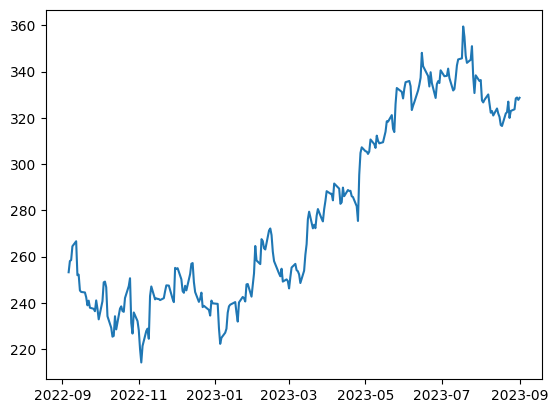

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2022-09-09',
                                '2023-09-01',
                                n=3)

In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((247,), (247, 3, 1), (247,))

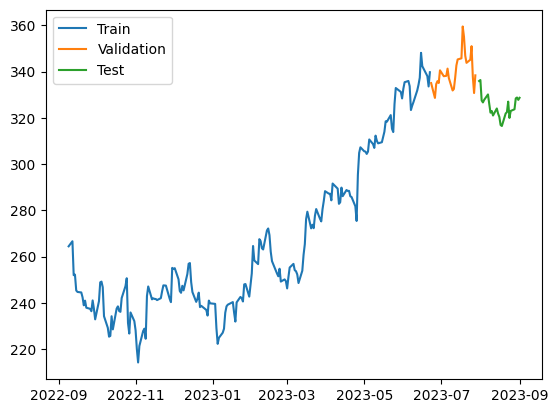

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 148ms/step - loss: 71144.6797 - mean_absolute_error: 264.6733 - val_loss: 115179.6172 - val_mean_absolute_error: 339.3018
Epoch 2/100
7/7 [==============================] - 0s 16ms/step - loss: 70841.4062 - mean_absolute_error: 264.1007 - val_loss: 114745.4922 - val_mean_absolute_error: 338.6614
Epoch 3/100
7/7 [==============================] - 0s 17ms/step - loss: 70477.0703 - mean_absolute_error: 263.4093 - val_loss: 114214.1172 - val_mean_absolute_error: 337.8760
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 70007.0859 - mean_absolute_error: 262.5170 - val_loss: 113490.6172 - val_mean_absolute_error: 336.8036
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 69412.3672 - mean_absolute_error: 261.3778 - val_loss: 112592.1484 - val_mean_absolute_error: 335.4672
Epoch 6/100
7/7 [==============================] - 0s 16ms/step - loss: 68609.5703 - mean_absolute_error: 259.8405 - val_los

7/7 [==============================] - 1s 3ms/step


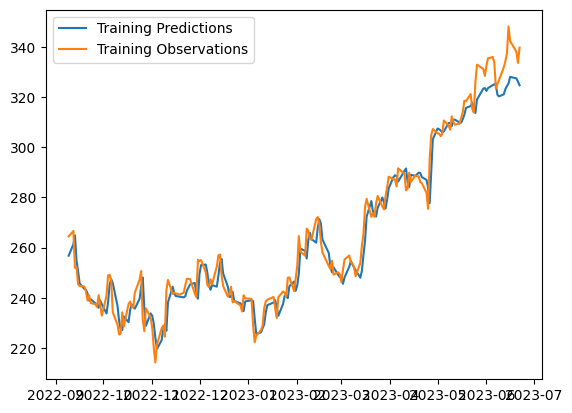

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 21ms/step


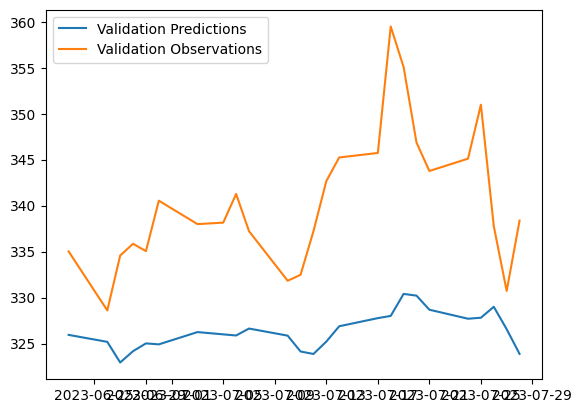

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 22ms/step


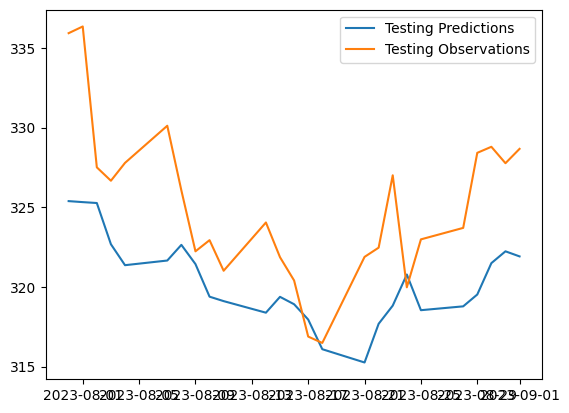

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

1/1 [==============================] - 0s 33ms/step
15.28994272823847


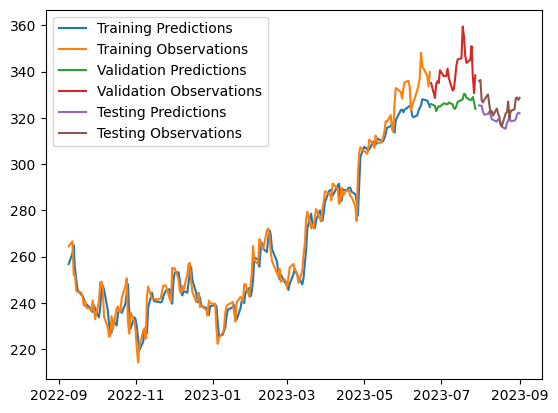

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
# Calculate the mean of y_val
mean_y_val = np.mean(y_val)

# Normalize y_val and y_pred
normalized_y_val = y_val / mean_y_val
normalized_y_pred = y_pred / mean_y_val

# Calculate the squared error
squared_error = (normalized_y_val - normalized_y_pred) ** 2

# Calculate the mean squared error
mse = np.mean(squared_error)

# Calculate the Root Mean Squared Normalized Error (RMSNE)
rmsne = np.sqrt(mse)

print("RMSNE:", rmsne)

# Calculate the absolute relative error for each data point
absolute_relative_error = np.abs((y_val - y_pred) / y_val)

# Square each absolute relative error
squared_absolute_relative_error = absolute_relative_error ** 2

# Calculate the mean of the squared absolute relative errors
mse = np.mean(squared_absolute_relative_error)

# Calculate the Root Mean Squared Relative Error (RMSRE)
rmsre = np.sqrt(mse)

print("RMSRE:", rmsre)

RMSNE: 0.046675406
RMSRE: 0.04573998


In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 21ms/step


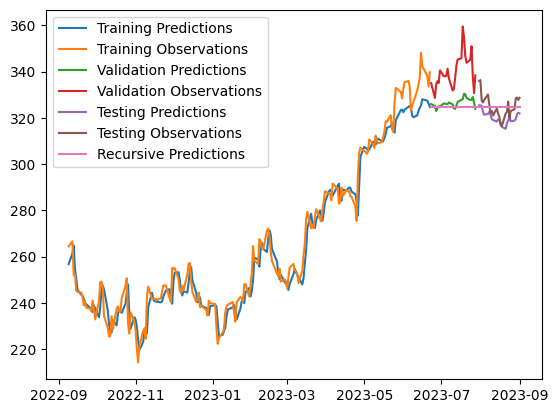

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])